# Housing Price Prediction
### Data Source: [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

#### Author: Nick Faupel
#### Start Date: 2024-01-15

## Overview

#### From Kaggle:

#### Goal:
Predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

#### Metric:
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)


#### Description:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [370]:
# Import any necessary libraries

import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from statsmodels.graphics.gofplots import ProbPlot

import sklearn
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from statsmodels.nonparametric.smoothers_lowess import lowess


import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warnings (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew 

# Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [371]:
# Show versions of some of the libraries used
import sys
print("Python version: ", sys.version)
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(sns.__name__, sns.__version__)
print(sklearn.__name__, sklearn.__version__)

Python version:  3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
numpy 1.24.3
pandas 2.1.4
seaborn 0.12.2
sklearn 1.3.0


## Dataset Description
### File descriptions
`train.csv` - the training set
`test.csv` - the test set
`data_description.txt` - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
`sample_submission.csv` - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms


### Data fields
In total, there are **81 variables**. This includes **79 predictor variables**, **1 Id column**, and **1 response variable**.\
Some of the predictor variables are categorical and dictionaries of their values can be found in the `data_description.txt` file. \
The response variable, `SalePrice`, is a continous numeric variable. Thus, this is a regression problem.

`SalePrice`: the property's sale price in dollars. This is the target variable that you're trying to predict. \
`MSSubClass`: The building class \
`MSZoning`: The general zoning classification \
`LotFrontage`: Linear feet of street connected to property \
`LotArea`: Lot size in square feet \
`Street`: Type of road access \
`Alley`: Type of alley access \
`LotShape`: General shape of property \
`LandContour`: Flatness of the property \
`Utilities`: Type of utilities available \
`LotConfig`: Lot configuration \
`LandSlope`: Slope of property \
`Neighborhood`: Physical locations within Ames city limits \
`Condition1`: Proximity to main road or railroad \
`Condition2`: Proximity to main road or railroad (if a second is present) \
`BldgType`: Type of dwelling \
`HouseStyle`: Style of dwelling \
`OverallQual`: Overall material and finish quality \
`OverallCond`: Overall condition rating \
`YearBuilt`: Original construction date \
`YearRemodAdd`: Remodel date \
`RoofStyle`: Type of roof \
`RoofMatl`: Roof material \
`Exterior1st`: Exterior covering on house \
`Exterior2nd`: Exterior covering on house (if more than one material) \
`MasVnrType`: Masonry veneer type \
`MasVnrArea`: Masonry veneer area in square feet \
`ExterQual`: Exterior material quality \
`ExterCond`: Present condition of the material on the exterior \
`Foundation`: Type of foundation \
`BsmtQual`: Height of the basement \
`BsmtCond`: General condition of the basement \
`BsmtExposure`: Walkout or garden level basement walls \
`BsmtFinType1`: Quality of basement finished area \
`BsmtFinSF1`: Type 1 finished square feet \
`BsmtFinType2`: Quality of second finished area (if present) \
`BsmtFinSF2`: Type 2 finished square feet \
`BsmtUnfSF`: Unfinished square feet of basement area \
`TotalBsmtSF`: Total square feet of basement area \
`Heating`: Type of heating \
`HeatingQC`: Heating quality and condition \
`CentralAir`: Central air conditioning \
`Electrical`: Electrical system \
`1stFlrSF`: First Floor square feet \
`2ndFlrSF`: Second floor square feet \
`LowQualFinSF`: Low quality finished square feet (all floors) \
`GrLivArea`: Above grade (ground) living area square feet \
`BsmtFullBath`: Basement full bathrooms \
`BsmtHalfBath`: Basement half bathrooms \
`FullBath`: Full bathrooms above grade \
`HalfBath`: Half baths above grade \
`Bedroom`: Number of bedrooms above basement level \
`Kitchen`: Number of kitchens \
`KitchenQual`: Kitchen quality \
`TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms) \
`Functional`: Home functionality rating \
`Fireplaces`: Number of fireplaces \
`FireplaceQu`: Fireplace quality \
`GarageType`: Garage location \
`GarageYrBlt`: Year garage was built \
`GarageFinish`: Interior finish of the garage \
`GarageCars`: Size of garage in car capacity \
`GarageArea`: Size of garage in square feet \
`GarageQual`: Garage quality \
`GarageCond`: Garage condition \
`PavedDrive`: Paved driveway \
`WoodDeckSF`: Wood deck area in square feet \
`OpenPorchSF`: Open porch area in square feet \
`EnclosedPorch`: Enclosed porch area in square feet \
`3SsnPorch`: Three season porch area in square feet \
`ScreenPorch`: Screen porch area in square feet \
`PoolArea`: Pool area in square feet \
`PoolQC`: Pool quality \
`Fence`: Fence quality \
`MiscFeature`: Miscellaneous feature not covered in other categories \
`MiscVal`: $Value of miscellaneous feature \
`MoSold`: Month Sold \
`YrSold`: Year Sold \
`SaleType`: Type of sale \
`SaleCondition`: Condition of sale \

Since the test dataset does not contain the SalePrice variable, I will only work with the train dataset for my analysis. 

In [372]:
# Load the training dataset
houses = pd.read_csv('train.csv')

# View the first 5 rows
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [373]:
print(f'The training dataset contains {houses.shape[0]} rows and {houses.shape[1]} columns')

# Check the column names
houses.columns

The training dataset contains 1460 rows and 81 columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

As this dataset has so many predictor variables, especially when considering the categorical variables with many values that would need to be transformed (encoded as dummy variables), it is likely that I will choose a smaller subset of these variables to work with. Odds are that not all of these variables are useful for making accurate predictions.

I believe this also makes sense given the overall size of the datasets, as they do not provide the number of observations we might expect to have available when working with real world data. Using too many predictor variables on such a small training dataset is likely to lead to overfitting since it may cause the model to pick up on too much noise.

In [374]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

First thing's first, let's check out the response variable we are modeling. In this case, it is SalePrice.

Numerical summary of SalePrice variable:
----------------------------------------


count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

----------------------------------------


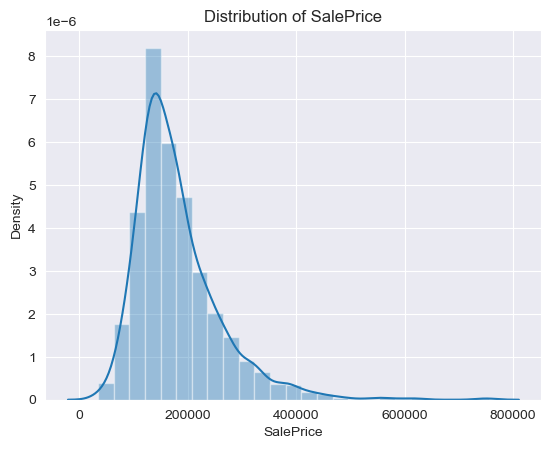

In [375]:
sns.distplot(houses["SalePrice"], hist=True, kde=True, bins=25);
plt.title('Distribution of SalePrice')


print('Numerical summary of SalePrice variable:')
print('----------------------------------------')
display(houses['SalePrice'].describe())
print('----------------------------------------')

SalePrice is right-skewed, with a mean of about 180,000 USD and a standard deviation of about 79,500 USD.

I also want to see how the square footage and "overall condition" variables relate to sales price, as these are typically pretty influential in the price a home ends up going for in any market. 

Another common driver is location, but it doesn't look like there's a very straightforward location variable to use for this quick look. So, we'll see if there's a way we can get that later.

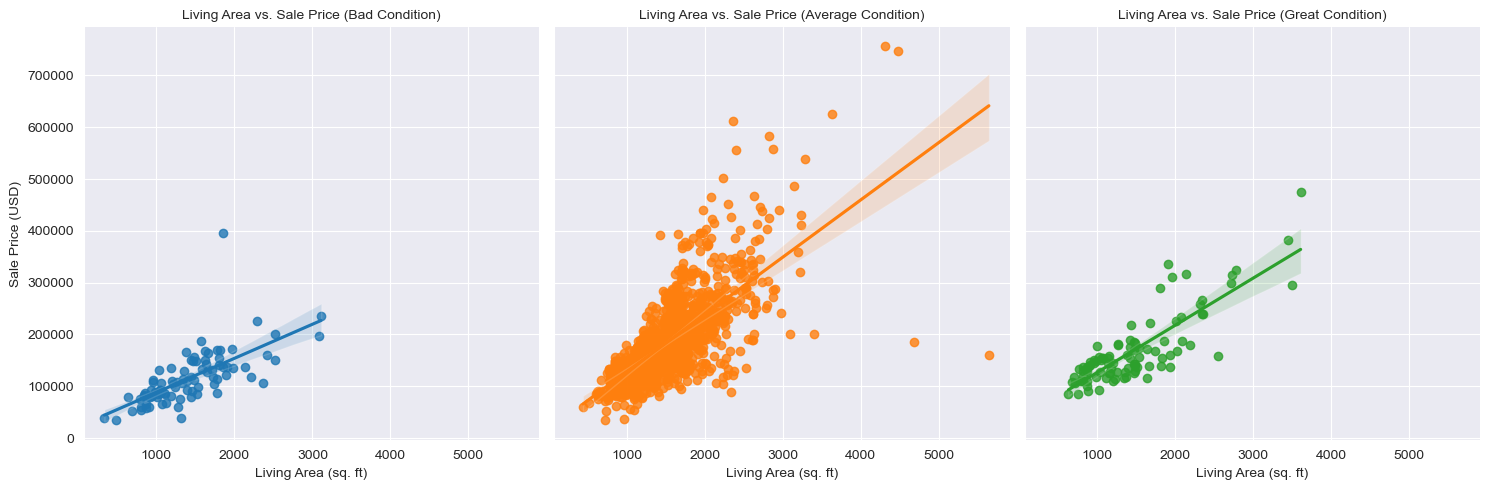

Overall_Cond_Groups
Average    1278
Great        94
Bad          88
Name: count, dtype: int64

In [376]:
# Create some quick condition buckets (based on guidance of data dictionary)
condition_bins = [1, 4, 7, 10]  # Bins boundaries
condition_labels = ['Bad', 'Average', 'Great']  # Labels for the bins

# Use pd.cut() to create the 'Overall_Cond_Groups' column
houses['Overall_Cond_Groups'] = pd.cut(houses['OverallCond'], bins=condition_bins, labels=condition_labels, include_lowest=True)

# Plot GrLivArea as a function of SalePrice across Overall_Cond_Groups
g = sns.lmplot(
    data=houses,
    x="GrLivArea", y="SalePrice",
    hue='Overall_Cond_Groups',
    col='Overall_Cond_Groups' 
)

# Set titles for each graph
g.set_axis_labels("Living Area (sq. ft)", "Sale Price (USD)")
g.set_titles(col_template='Living Area vs. Sale Price ({col_name} Condition)')

# Adjust plot parameters if needed (e.g., figsize)
g.fig.set_figwidth(15)  # Adjust the fig width 
g.fig.set_figheight(5)  # Adjust the fig height

# Show the plots
plt.show()


# Show the counts of each group
houses['Overall_Cond_Groups'].value_counts()

It looks like square footage has a strong relationship with sale price, which is not surprising. It also looks like this dataset has a lot of houses in average condition, with very few being in relatively bad or great condition. Interesting! 

Let's go ahead and start cleaning up this data for further analysis.

In [377]:
# Drop the Overall_Cond_Groups variable made for the above graph. I will likely make something similar later on, but it will be more informed.
houses.drop(columns=['Overall_Cond_Groups'], inplace=True)

#### Incorrectly coded categorical variables:

MSSubClass: Identifies the type of dwelling involved in the sale.	

- 20	=      1-STORY 1946 & NEWER ALL STYLES
- 30	=      1-STORY 1945 & OLDER
- 40	=      1-STORY W/FINISHED ATTIC ALL AGES
- 45	=      1-1/2 STORY - UNFINISHED ALL AGES
- 50	=      1-1/2 STORY FINISHED ALL AGES
- 60	=      2-STORY 1946 & NEWER
- 70	=      2-STORY 1945 & OLDER
- 75	=      2-1/2 STORY ALL AGES
- 80	=      SPLIT OR MULTI-LEVEL
- 85	=      SPLIT FOYER
- 90	=      DUPLEX - ALL STYLES AND AGES
- 120	=      1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150	=      1-1/2 STORY PUD - ALL AGES
- 160	=      2-STORY PUD - 1946 & NEWER
- 180	=      PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190	=      2 FAMILY CONVERSION - ALL STYLES AND AGES


OverallQual: Rates the overall material and finish of the house

- 10	=      Very Excellent
- 9	=      Excellent
- 8	=      Very Good
- 7	=      Good
- 6	=      Above Average
- 5	=      Average
- 4	=      Below Average
- 3	=      Fair
- 2	=      Poor
- 1	=      Very Poor
	
OverallCond: Rates the overall condition of the house

- 10	=      Very Excellent
- 9	=      Excellent
- 8	=      Very Good
- 7	=      Good
- 6	=      Above Average
- 5	=      Average
- 4	=      Below Average
- 3	=      Fair
- 2	=      Poor
- 1	=      Very Poor

In [378]:
# Fix some of the categorical variables that are coded incorrectly
cat_vars_to_fix = ['MSSubClass', 'OverallQual', 'OverallCond']

for i in cat_vars_to_fix:
    houses[i] = houses[i].astype('category')

# Check that the variable types have been correctly updated
houses[cat_vars_to_fix].dtypes

MSSubClass     category
OverallQual    category
OverallCond    category
dtype: object

In [379]:
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000
BsmtFinSF2,1460.000,46.549,161.319,0.000,0.000,0.000,0.000,1474.000
BsmtUnfSF,1460.000,567.240,441.867,0.000,223.000,477.500,808.000,2336.000
TotalBsmtSF,1460.000,1057.429,438.705,0.000,795.750,991.500,1298.250,6110.000


With the month sold variable, I will turn it into a seasonal variable that is a bit easier to work with but should maintain it's predictive power (if any).

In [380]:
# Define a dictionary to map months to seasons
season_mapping = {
    12: "Winter",
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Fall",
    10: "Fall",
    11: "Fall"
}

# Create a new column 'Season' based on the mapping
houses['SeasonSold'] = houses['MoSold'].apply(lambda x: season_mapping.get(x))

# Drop the original column
houses.drop(columns=['MoSold'], inplace=True)

In [381]:
houses['SeasonSold'].value_counts()

SeasonSold
Summer    609
Spring    451
Fall      231
Winter    169
Name: count, dtype: int64

Great, now let's do some basic data quality checks before going any further. I'll start by looking at duplicates

In [382]:
# Let's look for duplicates
print('Number of duplicate rows = ', houses.duplicated().sum())

Number of duplicate rows =  0


No overall duplicates. How about duplicate Ids?

In [383]:
id_list = houses['Id'].unique()

num_ids = len(id_list)

num_ids == houses.shape[0]

True

In [384]:
# Go ahead and drop Id column as it is not needed
houses.drop(columns=['Id'], inplace=True)

Great! Looks like we don't have to worry about duplicates. What about missing values?

In [385]:
# Compute percentage of missing values for each column
houses_na = (houses.isnull().sum() / len(houses)) * 100

# Drop any columns from all_data_na that don't have missing values, sort the remaining list by % missing, and get a subset of just the top 20
houses_na = houses_na.drop(houses_na[houses_na == 0].index).sort_values(ascending=False)[:20]

# Create a DataFrame for viewing
missing_data = pd.DataFrame({'Missing Ratio' : houses_na})


missing_data

,Missing Ratio
PoolQC,99.521
MiscFeature,96.301
Alley,93.767
Fence,80.753
MasVnrType,59.726
FireplaceQu,47.260
LotFrontage,17.740
GarageType,5.548
GarageYrBlt,5.548
GarageFinish,5.548


Yikes, there are definitely some variables with quite a few missing values. Some of these are explained in the data dictionary though, so let's get those updated first.

`PoolQC`: Pool quality
		
- Ex	Excellent
- Gd	Good
- TA	Average/Typical
- Fa	Fair
- NA	No Pool


`MiscFeature`: Miscellaneous feature not covered in other categories
		
- Elev   Elevator
- Gar2   2nd Garage (if not described in garage section)
- Othr   Other
- Shed   Shed (over 100 SF)
- TenC   Tennis Court
- NA     None


`Alley`: Type of alley access to property

- Grvl   Gravel
- Pave   Paved
- NA     No alley access


`Fence`: Fence quality
		
- GdPrv  Good Privacy
- MnPrv  Minimum Privacy
- GdWo   Good Wood
- MnWw   Minimum Wood/Wire
- NA     No Fence



`MasVnrType`: Masonry veneer type

- BrkCmn	Brick Common
- BrkFace	Brick Face
- CBlock	Cinder Block
- NA   	None
- Stone	Stone


`FireplaceQu`: Fireplace quality

- Ex	Excellent - Exceptional Masonry Fireplace
- Gd	Good - Masonry Fireplace in main level
- TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa	Fair - Prefabricated Fireplace in basement
- Po	Poor - Ben Franklin Stove
- NA	No Fireplace


`GarageType`: Garage location
		
- 2Types	More than one type of garage
- Attchd	Attached to home
- Basment	Basement Garage
- BuiltIn	Built-In (Garage part of house - typically has room above garage)
- CarPort	Car Port
- Detchd	Detached from home
- NA     No Garage


`GarageFinish`: Interior finish of the garage

- Fin	Finished
- RFn	Rough Finished	
- Unf	Unfinished
- NA	No Garage


`GarageQual`: Garage quality

- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor
- NA	No Garage


		
`GarageCond`: Garage condition

- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor
- NA	No Garage


`BsmtQual`: Evaluates the height of the basement

- Ex	Excellent (100+ inches)	
- Gd	Good (90-99 inches)
- TA	Typical (80-89 inches)
- Fa	Fair (70-79 inches)
- Po	Poor (<70 inches
- NA	No Basement

		
`BsmtCond`: Evaluates the general condition of the basement

- Ex	Excellent
- Gd	Good
- TA	Typical - slight dampness allowed
- Fa	Fair - dampness or some cracking or settling
- Po	Poor - Severe cracking, settling, or wetness
- NA	No Basement

In [386]:
# List of variables with missing values we can fill based on the data dictionary
null_variables = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond']

# Update missing values for the specified variables to "None" (which is most common for these variables)
houses[null_variables] = houses[null_variables].fillna('None')

We can definitely see that there may be quite a few redundant variables. This will make it easier to narrow down our final list later... \
But before moving on, let's look at our updated list now.

In [387]:
# Compute percentage of missing values for each column
houses_na = (houses.isnull().sum() / len(houses)) * 100

# Drop any columns from all_data_na that don't have missing values, sort the remaining list by % missing
houses_na = houses_na.drop(houses_na[houses_na == 0].index).sort_values(ascending=False)

# Create a DataFrame for viewing
missing_data = pd.DataFrame({'Missing Ratio' : houses_na})


missing_data

,Missing Ratio
LotFrontage,17.740
GarageYrBlt,5.548
BsmtExposure,2.603
BsmtFinType2,2.603
BsmtFinType1,2.534
MasVnrArea,0.548
Electrical,0.068


Great, this is a much more manageable list. 

count     1201.000
mean    180770.480
std      83389.520
min      34900.000
25%     127500.000
50%     159500.000
75%     213500.000
max     755000.000
Name: SalePrice, dtype: float64

count      259.000
mean    181620.073
std      57841.776
min      61000.000
25%     143375.000
50%     172400.000
75%     215000.000
max     466500.000
Name: SalePrice, dtype: float64

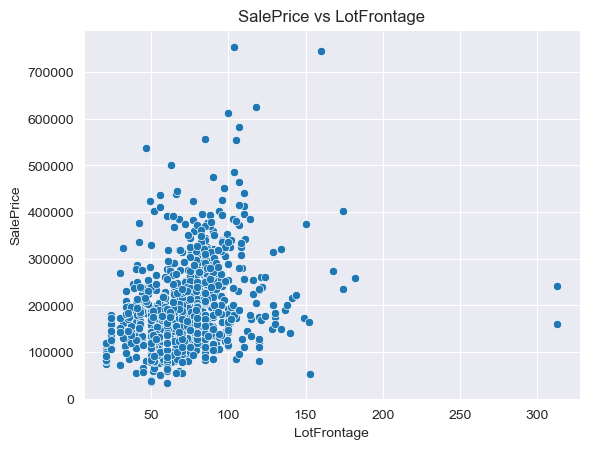

In [388]:
# Looking at LotFrontage vs SalePrice
sns.scatterplot(x='LotFrontage', y='SalePrice', data=houses)
plt.title('SalePrice vs LotFrontage');

# Check out the measurements of SalePrice with and without LotFrontage values
display(houses[~houses['LotFrontage'].isna()]['SalePrice'].describe())
display(houses[houses['LotFrontage'].isna()]['SalePrice'].describe())

In [389]:
# Let's fill LotFrontage with the median value, as in this case it does not appear to influence SalePrice much
lf_med = (houses['LotFrontage']).median()
houses['LotFrontage'].fillna(lf_med, inplace=True)



# For GarageYrBlt, let's just create a new variable that indicates whether a garage was added later

# First we'll impute 0s for the NAs
houses['GarageYrBlt'].fillna(0, inplace=True)
# Then let's calculate the difference between GarageYrBlt and YearBuilt
houses['gargebuilddiff'] = houses['GarageYrBlt'] - houses['YearBuilt']
# Now create a dictionary based on what we want to fill in for the new variable
houses['GarageAdded'] = np.select([(houses['gargebuilddiff'] > 0)], ['Yes'], default='No')
# Drop unnecessary variables
houses.drop(columns=['GarageYrBlt', 'gargebuilddiff'], inplace=True)



# Let's just go ahead and drop a few of these that don't appear to be helpful based on their descriptions and the availability of other similar variables
houses.drop(columns=['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrArea'], inplace=True)



# Our last one, Electrical. Since this refers to only 1 record, let's just drop that one record from the dataset
houses.dropna(subset=['Electrical'], inplace=True)


Let's check for NA's again. We should be good to go now!

In [390]:
len(houses.columns[houses.isna().any()].tolist()) == 0

True

Now that we've dealt with missing values, we can now start the process of eliminating redundant variables and simplifying or creating new variables where possible. \
Let's take another look at our current list of variables.

In [391]:
houses.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolA

In [392]:
# Quick reorder for better grouping
houses = houses[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 
       'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageAdded', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 
       'SeasonSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

Let's look at a correlation heatmap of the numerical variables.

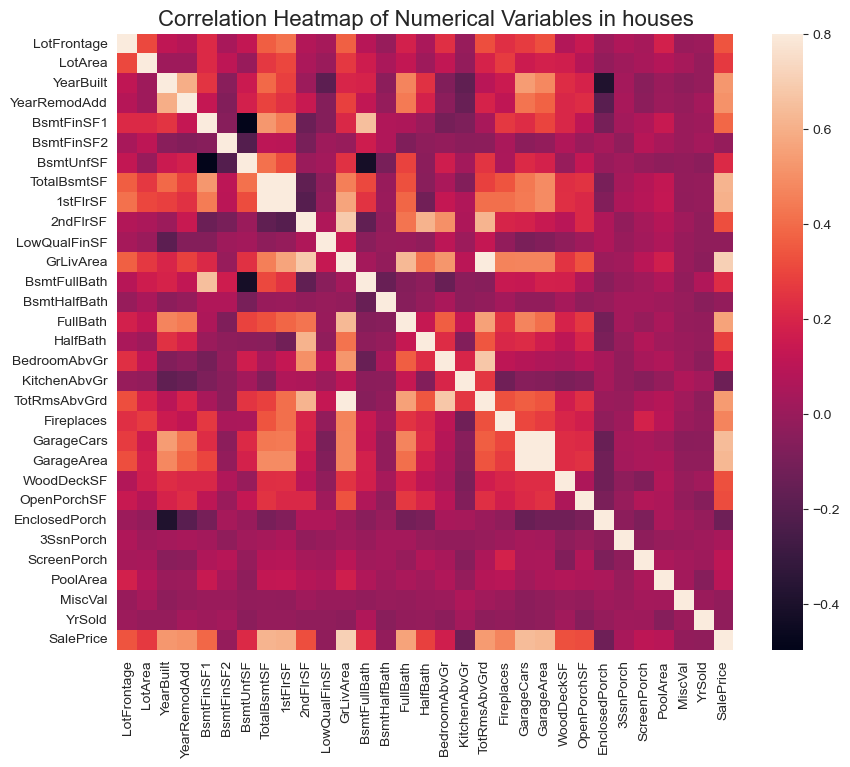

In [393]:
# Correlation matrix
corrmat = houses.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title('Correlation Heatmap of Numerical Variables in houses', fontsize=16)
plt.show();

Wow. Well, I don't know about you but I don't really get much from that. Information overload. Some quick observations before moving on:
- It looks like some of the basement variables and garage variables are highly correlated, which means there's probably a good opportunity for combining/removing some of the variables related to basements or garages.
- GrLivArea looks to have the highest correlation with SalePrice.
- Total Rooms (TotRmsAbvGrd) is highly correlated with GrLivArea.

How about we just look at a list of correlations for these numerical variables with SalePrice, sorted by value.

In [394]:
corrmat.sort_values(["SalePrice"], ascending = False, inplace = True)

corrmat['SalePrice']

SalePrice        1.000
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
Fireplaces       0.467
BsmtFinSF1       0.386
LotFrontage      0.335
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
LowQualFinSF    -0.026
YrSold          -0.029
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64

That's a bit better, though it may not look as cool! GarageArea can probably be dropped, given that GarageCars has a slightly better correlation with SalePrice and likely contains much of the same information as GarageArea.

All things considered though, I think I may have better luck just using my intuition when it comes to some of these variables. Using my knowledge about houses, I believe I will be able to do some feature engineering and feature selection before moving forward with more a more math-based approach later.

First, let's check out this `MSSubClass` variable. Here's what the data dictionary says about it:

MSSubClass: Identifies the type of dwelling involved in the sale.	

- 20	=   1-STORY 1946 & NEWER ALL STYLES
- 30	=   1-STORY 1945 & OLDER
- 40	=   1-STORY W/FINISHED ATTIC ALL AGES
- 45	=   1-1/2 STORY - UNFINISHED ALL AGES
- 50	=   1-1/2 STORY FINISHED ALL AGES
- 60	=   2-STORY 1946 & NEWER
- 70	=   2-STORY 1945 & OLDER
- 75	=   2-1/2 STORY ALL AGES
- 80	=   SPLIT OR MULTI-LEVEL
- 85	=   SPLIT FOYER
- 90	=   DUPLEX - ALL STYLES AND AGES
- 120	=   1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150	=   1-1/2 STORY PUD - ALL AGES
- 160	=   2-STORY PUD - 1946 & NEWER
- 180	=   PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190	=   2 FAMILY CONVERSION - ALL STYLES AND AGES

In [395]:
# Summarize their counts and mean SalePrice associated
houses.groupby('MSSubClass', as_index=False)['SalePrice'].agg(['count', 'mean'])

,MSSubClass,count,mean
0,20,536,185224.812
1,30,69,95829.725
2,40,4,156125.000
3,45,12,108591.667
4,50,144,143302.972
5,60,299,239948.502
6,70,60,166772.417
7,75,16,192437.500
8,80,57,169775.789
9,85,20,147810.000


It looks like `MSSubClass` may have some redundant information that we can get from other variables, such as:

`BldgType`: Type of dwelling
		
- 1Fam	Single-family Detached	
- 2FmCon	Two-family Conversion; originally built as one-family dwelling
- Duplx	Duplex
- TwnhsE	Townhouse End Unit
- TwnhsI	Townhouse Inside Unit
	
`HouseStyle`: Style of dwelling
	
- 1Story	One story
- 1.5Fin	One and one-half story: 2nd level finished
- 1.5Unf	One and one-half story: 2nd level unfinished
- 2Story	Two story
- 2.5Fin	Two and one-half story: 2nd level finished
- 2.5Unf	Two and one-half story: 2nd level unfinished
- SFoyer	Split Foyer
- SLvl	Split Level

`YearBuilt`: Original construction date


Let's remove `MSSubClass` and take a look at `BldgType` and `HouseStyle`.

In [396]:
# Remove MSSubClass
houses.drop(columns=['MSSubClass'], inplace=True)

In [397]:
# Summarize
houses.groupby('BldgType', as_index=False)['SalePrice'].agg(['count', 'mean', 'std'])

,BldgType,count,mean,std
0,1Fam,1219,185778.790,82680.766
1,2fmCon,31,128432.258,35458.545
2,Duplex,52,133541.077,27833.249
3,Twnhs,43,135911.628,41013.222
4,TwnhsE,114,181959.342,60626.109


I think `BldgType` could be simplified to classify houses as either 'Singular' and 'Communal', indicating whether a home has shared walls or not. However, looking at the results above, I will group TwnhsE with 'Singular' as it seems to be more aligned with 1Fam than it does with the other 'Communal' homes.

In [398]:
# Create new variable based on simplified categories of BldgType
houses['BldgType_cat'] = np.select([(houses['BldgType'] == '1Fam') | (houses['BldgType'] == 'TwnhsE')], ['Singular'], default='Communal')

# Drop BldgType
houses.drop(columns=['BldgType'], inplace=True)

# Summarize
houses.groupby('BldgType_cat', as_index=False)['SalePrice'].agg(['count', 'mean', 'std'])

,BldgType_cat,count,mean,std
0,Communal,126,133093.143,34513.931
1,Singular,1333,185452.146,81018.461


In [399]:
# Summarize
houses.groupby('HouseStyle', as_index=False)['SalePrice'].agg(['count', 'mean', 'std'])

,HouseStyle,count,mean,std
0,1.5Fin,154,143116.740,54277.941
1,1.5Unf,14,110150.000,19036.473
2,1Story,726,175985.478,77055.715
3,2.5Fin,8,220000.000,118211.977
4,2.5Unf,11,157354.545,63934.128
5,2Story,445,210051.764,87339.214
6,SFoyer,37,135074.486,30480.898
7,SLvl,64,166690.938,38607.841


`HouseStyle` doesn't appear to provide much value, especially considering we can probably get most of this info from other variables. Let's remove it as well.

In [400]:
houses.drop(columns=['HouseStyle'], inplace=True)

Now let's check out the `MSZoning` variable. Data dictionary provides the following:

`MSZoning`: Identifies the general zoning classification of the sale.
		
- A	 = Agriculture
- C	 = Commercial
- FV = 	Floating Village Residential
- I	 = Industrial
- RH = 	Residential High Density
- RL = 	Residential Low Density
- RP = 	Residential Low Density Park 
- RM = 	Residential Medium Density

MSZoning
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

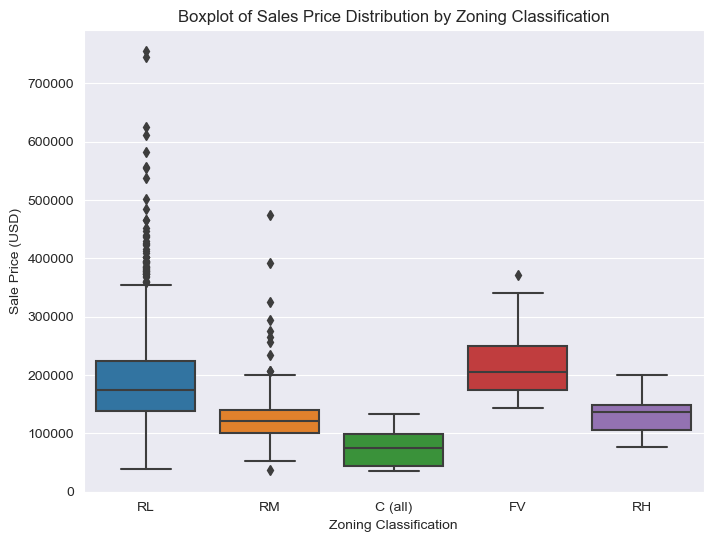

In [427]:
# Show the counts of each group
display(houses['MSZoning'].value_counts())

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Boxplot of SalePrice across MSZoning groups
h = sns.boxplot(
    data=houses,
    x="MSZoning",
    y="SalePrice"
)

# Set plot labels
h.set_xlabel("Zoning Classification")
h.set_ylabel("Sale Price (USD)")
h.set_title("Boxplot of Sales Price Distribution by Zoning Classification")

# Show the plot
plt.show()

Based on these graphs, it does look like there is some variation across the different categories, especially with respect to the commercial properties, which are mostly below 100,000 USD. Unfortunately not all possible values of this variable are represented in the training set. I'm going simplify this variable by turning it into an indicator of whether the home is zoned for residential or not, as it appears that houses not in residential areas are cheaper on average, which makes sense.

In [337]:
# Create a new variable indicating if MSZoning is residential
resident_zones = ['FV', 'RH', 'RL', 'RP', 'RM']
houses['MSZoneResidential'] = houses['MSZoning'].isin(resident_zones).astype(int)

# Drop original MSZoning variable
houses.drop(columns=['MSZoning'], inplace=True)

# Check values of new column
houses.groupby('MSZoneResidential', as_index=False)['SalePrice'].agg(['count', 'mean'])

,MSZoneResidential,count,mean
0,0,10,74528.000
1,1,1449,181664.711


Now let's look at these variables below, all of which seem to be in some way, shape, or form related to the lot/land the house is located on.


`LotFrontage`: Linear feet of street connected to property

`LotArea`: Lot size in square feet

`Street`: Type of road access to property

- Grvl	Gravel	
- Pave	Paved
       	
`Alley`: Type of alley access to property

- Grvl	Gravel
- Pave	Paved
- None 	No alley access
		
`LotShape`: General shape of property

- Reg	Regular	
- IR1	Slightly irregular
- IR2	Moderately Irregular
- IR3	Irregular
       
`LandContour`: Flatness of the property

- Lvl	Near Flat/Level	
- Bnk	Banked - Quick and significant rise from street grade to building
- HLS	Hillside - Significant slope from side to side
- Low	Depression


`LotConfig`: Lot configuration

- Inside	Inside lot
- Corner	Corner lot
- CulDSac	Cul-de-sac
- FR2	Frontage on 2 sides of property
- FR3	Frontage on 3 sides of property
	
`LandSlope`: Slope of property
		
- Gtl	Gentle slope
- Mod	Moderate Slope	
- Sev	Severe Slope


`Condition1`: Proximity to various conditions
	
- Artery	Adjacent to arterial street
- Feedr	Adjacent to feeder street	
- Norm	Normal	
- RRNn	Within 200' of North-South Railroad
- RRAn	Adjacent to North-South Railroad
- PosN	Near positive off-site feature--park, greenbelt, etc.
- PosA	Adjacent to postive off-site feature
- RRNe	Within 200' of East-West Railroad
- RRAe	Adjacent to East-West Railroad
	
`Condition2`: Proximity to various conditions (if more than one is present)
		
- Artery	Adjacent to arterial street
- Feedr	Adjacent to feeder street	
- Norm	Normal	
- RRNn	Within 200' of North-South Railroad
- RRAn	Adjacent to North-South Railroad
- PosN	Near positive off-site feature--park, greenbelt, etc.
- PosA	Adjacent to postive off-site feature
- RRNe	Within 200' of East-West Railroad
- RRAe	Adjacent to East-West Railroad

Let's just run a regression with these variables to see if any of them are even statistically significant.

In [338]:
# First need to convert categoical variables to categorical dtype so MS function can turn them into dummy variables correctly

lot_vars = ['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2']

for col_name in lot_vars:
    if houses[col_name].dtype == 'object':
        houses[col_name] = houses[col_name].astype('category')

# Quick model of lot_vars on SalePrice
y = houses['SalePrice']
X_lot = MS(lot_vars).fit_transform(houses)
lot_model = sm.OLS(y, X_lot)
lot_results = lot_model.fit()
lot_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     16.05
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.57e-74
Time:                        21:38:34   Log-Likelihood:                -18307.
No. Observations:                1459   AIC:                         3.668e+04
Df Residuals:                    1426   BIC:                         3.686e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept          -1.393e+05   5.92e+04     -2.352      0.019   -2.56e+05   -2.31e+04
LotFrontage         1024.0550     94.335     10.856      0.000     839.005    1209.105
LotArea                1.8484      0.251      7.374      0.000       1.357       2.340
Street[Pave]        1.084e+05   2.98e+04      3.636      0.000    4.99e+04    1.67e+05
Alley[None]         3.297e+04   1.03e+04      3.207      0.001    1.28e+04    5.31e+04
Alley[Pave]         5.361e+04   1.48e+04      3.623      0.000    2.46e+04    8.26e+04
LotShape[IR2]       1.544e+04   1.17e+04      1.325      0.185   -7412.771    3.83e+04
LotShape[IR3]      -7.069e+04   2.34e+04     -3.021      0.003   -1.17e+05   -2.48e+04
LotShape[Reg]       -2.49e+04   4270.030     -5.832      0.000   -3.33e+04   -1.65e+04
LandContour[HLS]    6.327e+04   1.34e+04      4.734      0.000    3.71e+04    8.95e+04
LandContour[Low]    1.886e+04   1.61e+04      1.172      0.241   -1.27e+04    5.04e+04
LandContour[Lvl]    3.561e+04   9444.986      3.770      0.000    1.71e+04    5.41e+04
LotConfig[CulDSac]  2.846e+04   9019.723      3.156      0.002    1.08e+04    4.62e+04
LotConfig[FR2]      9105.3388   1.11e+04      0.817      0.414   -1.27e+04     3.1e+04
LotConfig[FR3]      4.757e+04   3.62e+04      1.313      0.189   -2.35e+04    1.19e+05
LotConfig[Inside]   1.152e+04   4984.747      2.312      0.021    1745.609    2.13e+04
LandSlope[Mod]      4141.0194   1.06e+04      0.392      0.695   -1.66e+04    2.48e+04
LandSlope[Sev]     -9.044e+04   2.48e+04     -3.643      0.000   -1.39e+05   -4.17e+04
Condition1[Feedr]  -5932.5837   1.32e+04     -0.448      0.654   -3.19e+04       2e+04
Condition1[Norm]    3.592e+04   1.08e+04      3.332      0.001    1.48e+04    5.71e+04
Condition1[PosA]    8125.4809   2.69e+04      0.302      0.762   -4.46e+04    6.09e+04
Condition1[PosN]    5.244e+04      2e+04      2.628      0.009    1.33e+04    9.16e+04
Condition1[RRAe]   -1.119e+04   2.35e+04     -0.477      0.634   -5.72e+04    3.48e+04
Condition1[RRAn]    4.476e+04    1.8e+04      2.484      0.013    9408.022    8.01e+04
Condition1[RRNe]    1.919e+04   5.01e+04      0.383      0.702   -7.91e+04    1.17e+05
Condition1[RRNn]    6.942e+04   3.47e+04      2.002      0.045    1414.103    1.37e+05
Condition2[Feedr]  -4.795e+04   5.89e+04     -0.814      0.416   -1.64e+05    6.76e+04
Condition2[Norm]    2.813e+04   5.03e+04      0.559      0.576   -7.06e+04    1.27e+05
Condition2[PosA]     1.99e+05   8.48e+04      2.347      0.019    3.27e+04    3.65e+05
Condition2[PosN]    3.787e+04   7.23e+04      0.524      0.600   -1.04e+05     1.8e+05
Condition2[RRAe]     4.12e+04   8.59e+04      0.480      0.631   -1.27e+05     2.1e+05
Condition2[RRAn]    1.329e+04   8.57e+04      0.155      0.877   -1.55e+05    1.81e+05
Condition2[RRNn]   -2.957e+04    7.1e+

Hmmm, let's try a random forest model as well and look at feature importances.

In [349]:
# Convert categorical variables to dummy/indicator variables
X_lot_rf = pd.get_dummies(houses[lot_vars], drop_first=True)
y = houses['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lot_rf, y, test_size=0.2, random_state=42)

# Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Variable':X_lot_rf.columns, 'Importance':rf.feature_importances_})

feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

,Variable,Importance
0,LotArea,0.507
1,LotFrontage,0.308
2,LotShape_Reg,0.036
3,LotConfig_Inside,0.030
4,LotConfig_CulDSac,0.017
5,LandContour_HLS,0.016
6,Condition1_Norm,0.014
7,LandSlope_Mod,0.012
8,LandContour_Lvl,0.008
9,LotShape_IR2,0.008


Based on the feature importance from above, as well as the p-values from the linear regression model, I am only going to keep LotArea and LotFrontage. LotArea and LotFrontage made up 80% of the feature importance in the random forest model, and both had p-values that were statistically significant at the 0.01 level in the linear regression model. They still may not end up being included in the final model, but they are worth experimenting with more later.

In [363]:
# Drop all lot variables besides LotArea and LotFrontage
houses.drop(columns=['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2'], inplace=True)

In [365]:
houses.columns

Index(['LotFrontage', 'LotArea', 'Utilities', 'Neighborhood', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageAdded',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'SeasonSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'BldgType_cat', 'MSZ

Next, let's look at ...